In [1]:
import pandas as pd
import numpy as np
import random
import re

In [2]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/" \
            "IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv"

#### Load the data from the link
The dataset contains food recipes from various countries and their ingredients. The target variable is the name of the country the recipe is from.

In [3]:
recipes = pd.read_csv(data_url)

Show the first 5 items

In [4]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


Check the data dimensions

In [5]:
recipes.shape

(57691, 384)

Our data set have 57691 recipes with 384 ingredients.

#### Rename the `country` column to `Cuisine`

In [6]:
recipes.rename(columns={"country":"cuisine"}, inplace=True)
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [7]:
display(recipes["cuisine"].value_counts().index)
display(len(recipes["cuisine"].value_counts().index))

Index(['American', 'Mexico', 'Italian', 'Italy', 'Asian', 'French',
       'east_asian', 'Canada', 'korean', 'Mexican', 'western',
       'Southern_SoulFood', 'India', 'Jewish', 'Spanish_Portuguese',
       'Mediterranean', 'UK-and-Ireland', 'Indian', 'France', 'MiddleEastern',
       'Central_SouthAmerican', 'Germany', 'Eastern-Europe', 'Chinese',
       'Greek', 'English_Scottish', 'Caribbean', 'Thai', 'Scandinavia',
       'EasternEuropean_Russian', 'Cajun_Creole', 'Moroccan', 'Japanese',
       'China', 'Thailand', 'African', 'Southwestern', 'South-America',
       'japanese', 'Scandinavian', 'chinese', 'Irish', 'Japan', 'Spain',
       'italian', 'Vietnamese', 'North-African', 'German', 'Portugal',
       'Philippines', 'Korea', 'Netherlands', 'Lebanon', 'Vietnam', 'Austria',
       'Iran', 'Switzerland', 'Pakistan', 'Malaysia', 'asian', 'Turkey',
       'South-African', 'mexico', 'West-African', 'Indonesia', 'Belgium',
       'East-African', 'Israel', 'Bangladesh'],
      dtype='

69

There are duplicates in the cuisine columns that we need to take care of.

In [8]:
recipes["cuisine"] = recipes["cuisine"].apply(str.lower)
display(recipes["cuisine"].value_counts().index)
display(len(recipes["cuisine"].value_counts().index))

Index(['american', 'italian', 'mexico', 'italy', 'asian', 'french',
       'east_asian', 'canada', 'korean', 'mexican', 'western',
       'southern_soulfood', 'india', 'jewish', 'chinese', 'spanish_portuguese',
       'mediterranean', 'uk-and-ireland', 'indian', 'france', 'middleeastern',
       'central_southamerican', 'germany', 'japanese', 'eastern-europe',
       'greek', 'english_scottish', 'caribbean', 'thai', 'scandinavia',
       'easterneuropean_russian', 'cajun_creole', 'moroccan', 'china',
       'thailand', 'african', 'southwestern', 'south-america', 'scandinavian',
       'irish', 'japan', 'spain', 'vietnamese', 'north-african', 'german',
       'portugal', 'philippines', 'korea', 'netherlands', 'lebanon', 'vietnam',
       'austria', 'iran', 'switzerland', 'pakistan', 'malaysia',
       'south-african', 'turkey', 'west-african', 'indonesia', 'belgium',
       'east-african', 'israel', 'bangladesh'],
      dtype='object')

64

Remove duplicates

In [9]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

display(len(recipes["cuisine"].value_counts().index))

50

Now we have a total of **50** different cuisines instead of **69**.

Remove cuisine with less than **50** recipes.

In [10]:
to_remove = recipes["cuisine"].value_counts()[recipes["cuisine"].value_counts() < 50]
to_remove

philippine       43
dutch            32
lebanese         31
austrian         21
iranian          21
swiss            20
pakistani        19
malaysian        18
south-african    16
turkish          16
west-african     13
indonesian       12
east-african     11
belgian          11
israeli           9
bangladesh        4
Name: cuisine, dtype: int64

In [11]:
recipes = recipes[~recipes["cuisine"].isin(to_remove.index)].reset_index(drop=True)

In [12]:
recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57390,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57391,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57392,japanese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


We have removed **297** rows.
Now we need to convert `No` to `0` and `Yes` to `1`.

In [13]:
recipes = recipes.replace({"No":0, "Yes":1})
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
recipes["cuisine"].value_counts()

american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       320
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
southweste

#### Build a Decision Tree classifier to predict a cuisine's origin from its ingredients.
There are over 40,000 american recipes. We will exclude American recipes because it will cause a huge bias towards American recipes otherwise.
For the first model, we will use cuisine from the following country `korean, japanese, chinese, thai, indian`.

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [17]:
asian_recipes = recipes[recipes["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])].reset_index(drop=True)
asian_recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create training features and target labels and fit the decision tree model on the data.

In [22]:
cuisines = asian_recipes["cuisine"]
ingredients = asian_recipes.loc[:, asian_recipes.columns != "cuisine"]

asian_tree = tree.DecisionTreeClassifier(max_depth=3)
asian_tree.fit(ingredients, cuisines)

DecisionTreeClassifier(max_depth=3)

Plot the decision tree for better visualization.

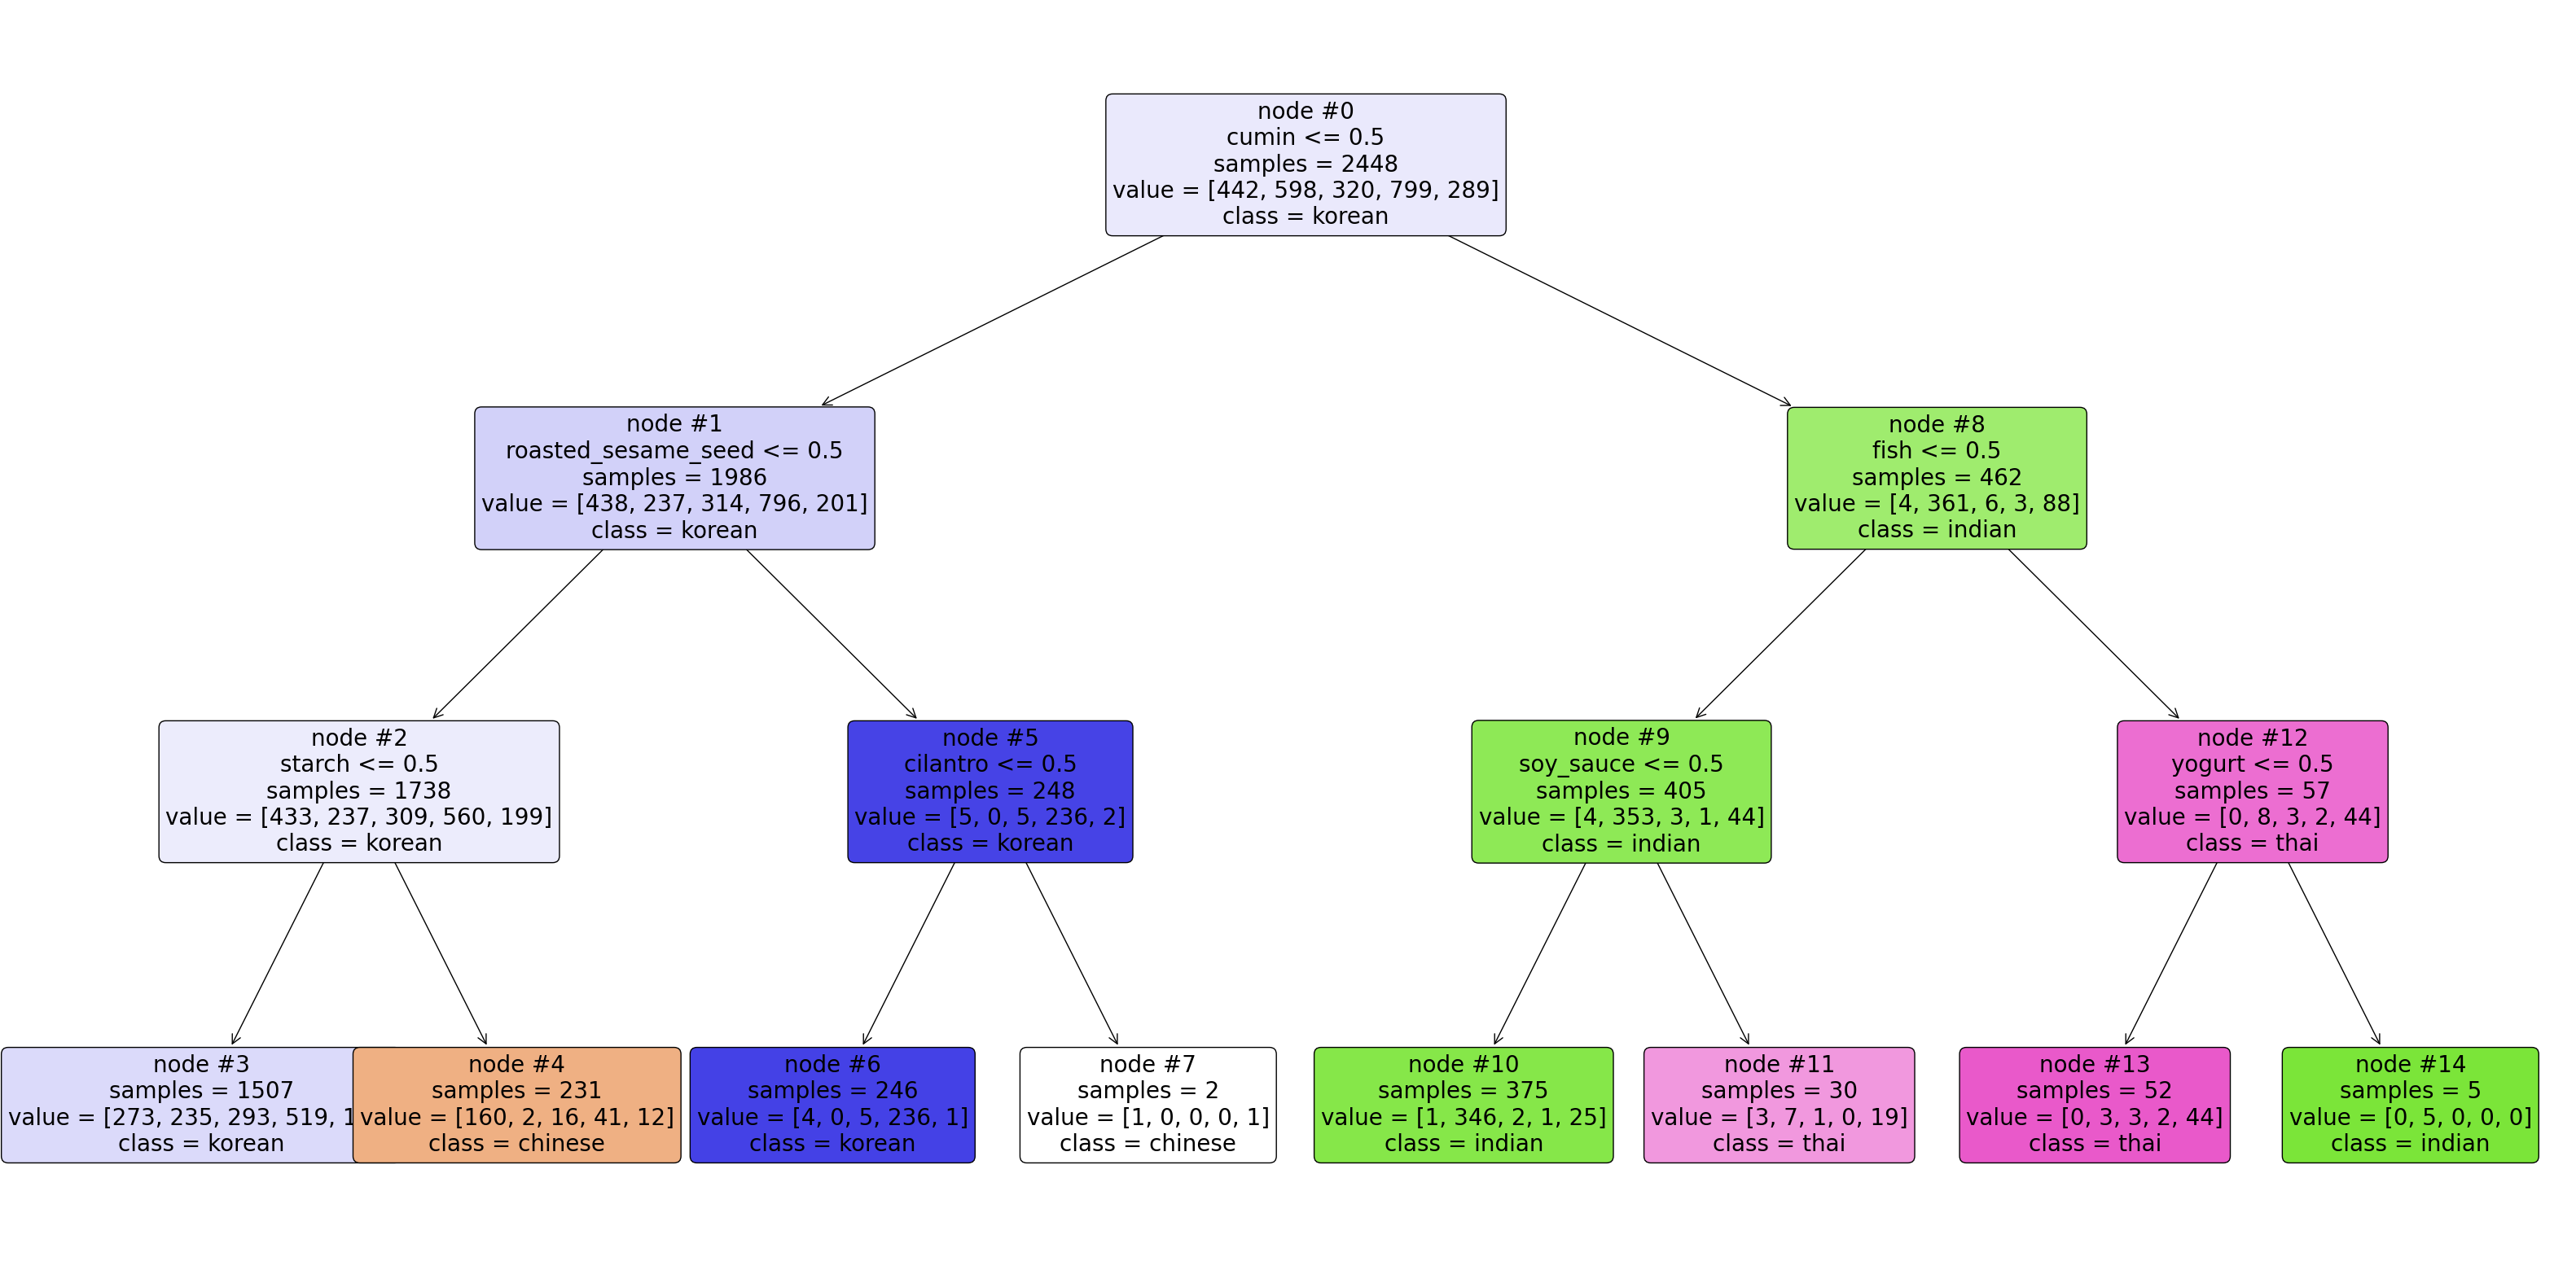

In [23]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(asian_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

#### Example classification:
1. If a recipe contains no cumin, no roasted sesame seed, no starch, it is likely an Korean recipe.
2. If a recipe contains cumin but no fish no soy_sauce, then it is most likely an Indian recipe.


Create a test set of 30 recipes from each country

In [52]:
asian_test = asian_recipes.groupby("cuisine").sample(30, random_state=42)
asian_test["cuisine"]

861     chinese
649     chinese
510     chinese
2117    chinese
511     chinese
         ...   
429        thai
2248       thai
361        thai
400        thai
342        thai
Name: cuisine, Length: 150, dtype: object

Create test features and labels.

In [47]:
test_cuisine = asian_test["cuisine"]
test_ingredients = asian_test.loc[:, asian_test.columns != "cuisine"]

The train set will be the rest of the recipes.

In [62]:
asian_train = asian_recipes[~asian_recipes.index.isin(test_cuisine.index)]
asian_train

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create train features and labels.

In [65]:
train_cuisines = asian_train["cuisine"]
train_ingredients = asian_train.loc[:, asian_train.columns != "cuisine"]

Initialize another decision tree model with `max_depth = 15`.

In [66]:
asian_recipe_tree = tree.DecisionTreeClassifier(max_depth=15)
asian_recipe_tree.fit(train_ingredients, train_cuisines)

DecisionTreeClassifier(max_depth=15)

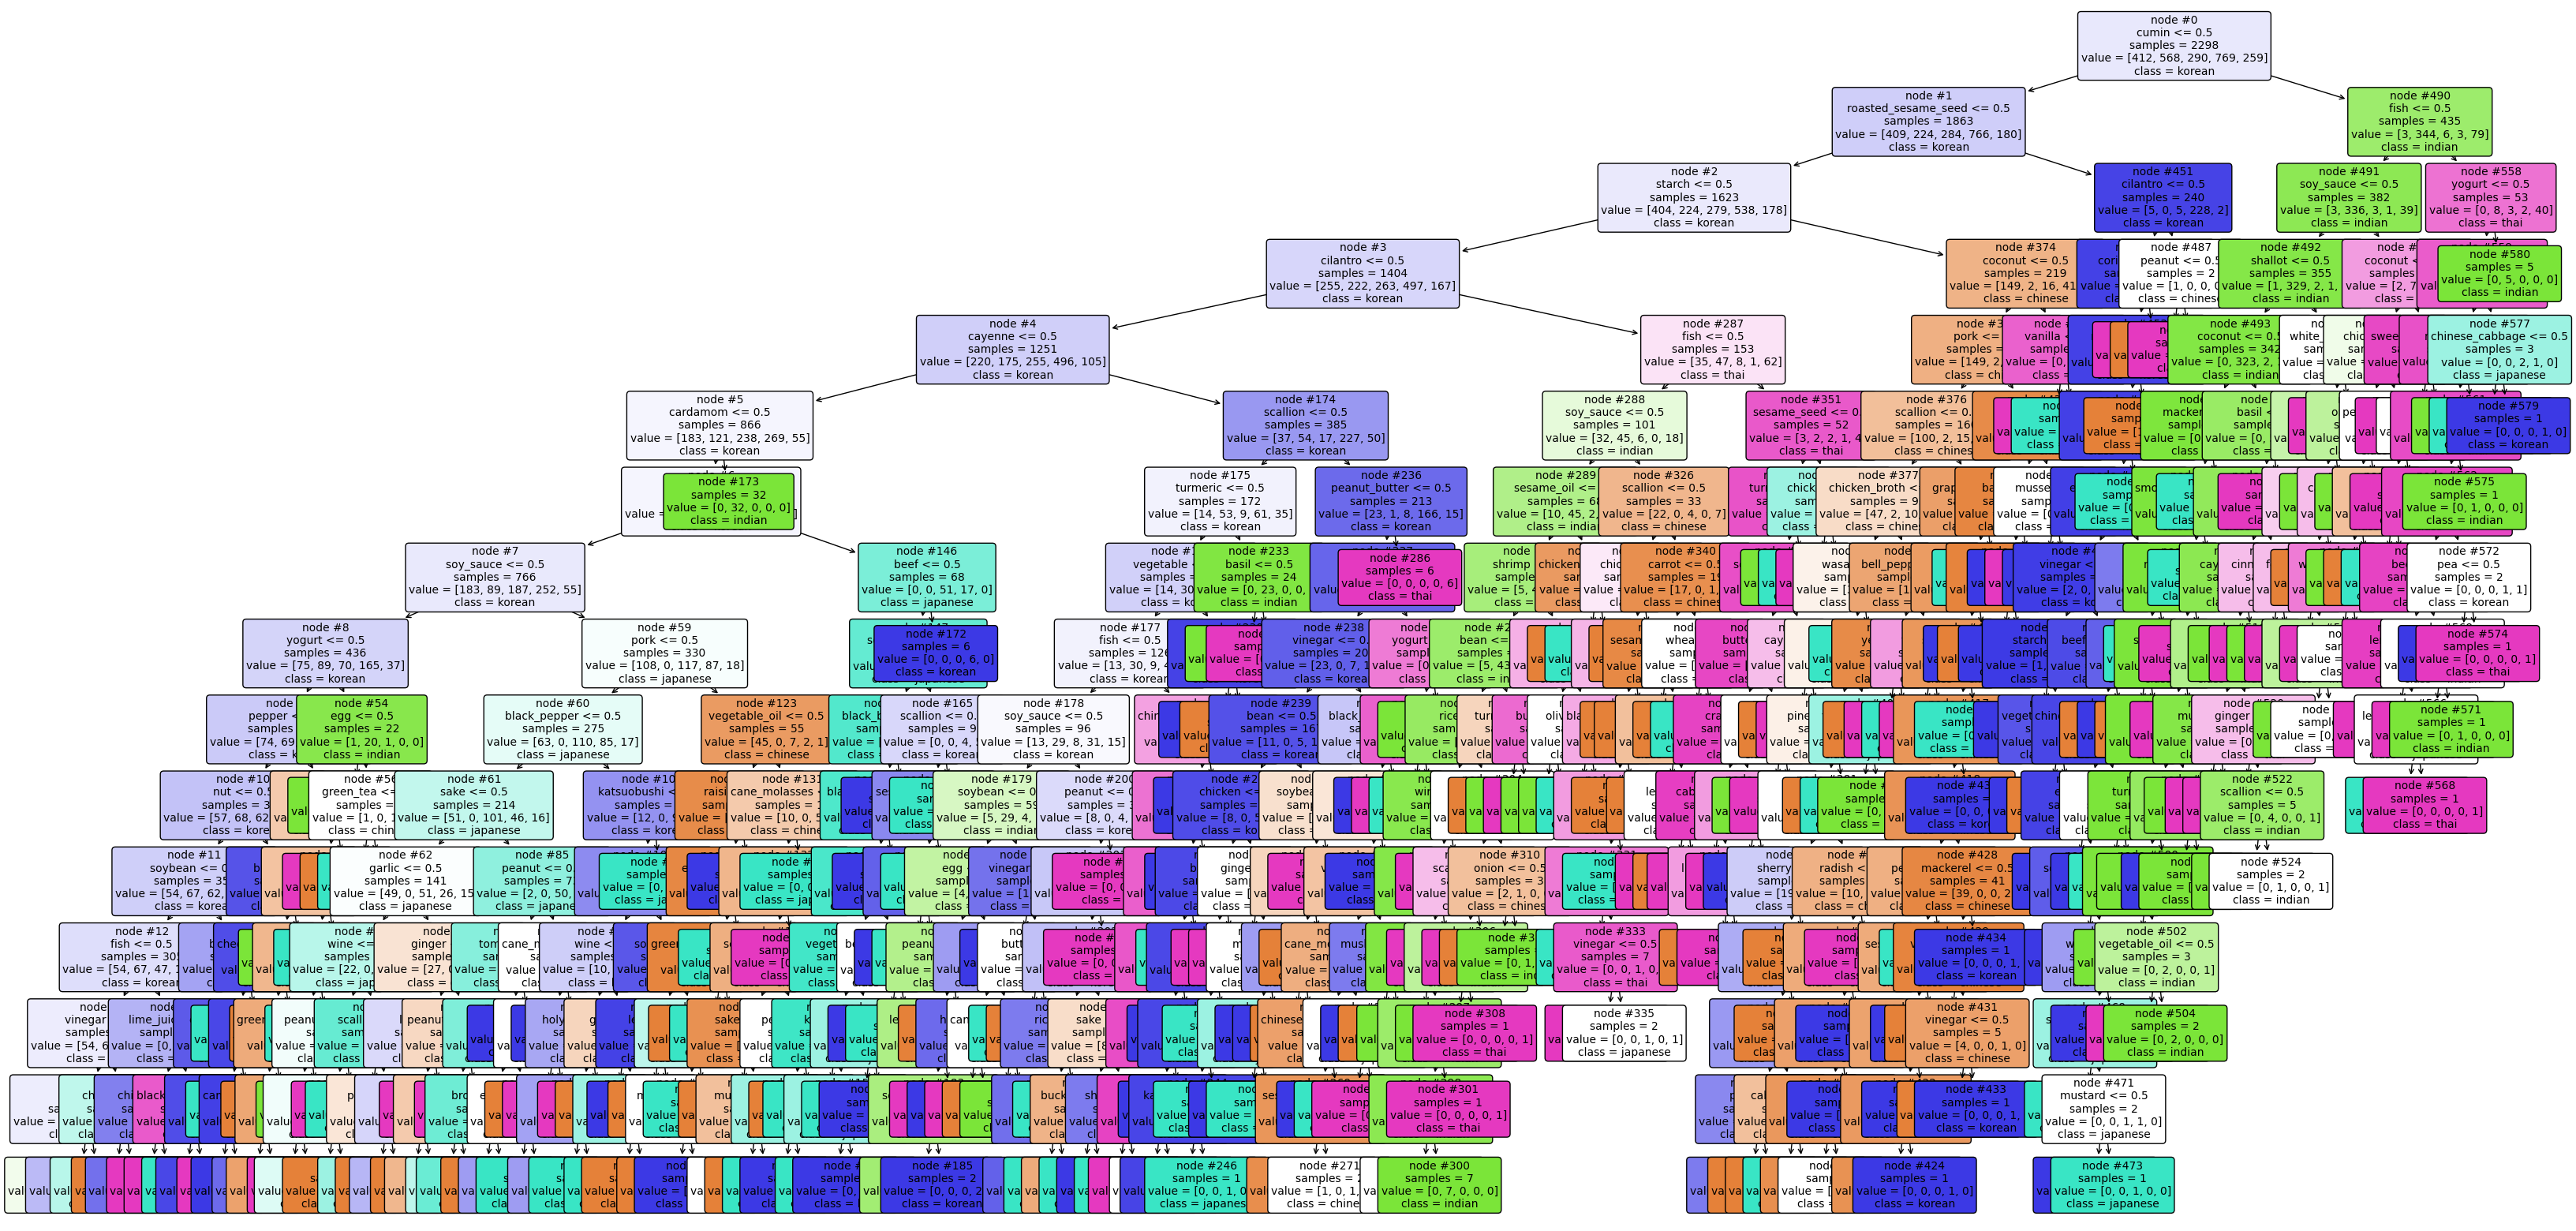

In [67]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(asian_recipe_tree,
                   feature_names=list(train_ingredients.columns.values),
                   class_names=np.unique(train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

In [69]:
test_cuisines_pred = asian_recipe_tree.predict(test_ingredients)

In [77]:
asian_confusion_matrix = confusion_matrix(test_cuisine, test_cuisines_pred, labels=np.unique(test_cuisine))
asian_confusion_matrix = asian_confusion_matrix.astype('float') / asian_confusion_matrix.sum(axis=1) * 100
asian_confusion_matrix

array([[56.66666667, 10.        , 10.        , 20.        ,  3.33333333],
       [ 6.66666667, 86.66666667,  0.        ,  0.        ,  6.66666667],
       [ 6.66666667, 10.        , 70.        , 13.33333333,  0.        ],
       [ 0.        , 13.33333333, 10.        , 76.66666667,  0.        ],
       [ 3.33333333, 33.33333333,  6.66666667, 10.        , 46.66666667]])

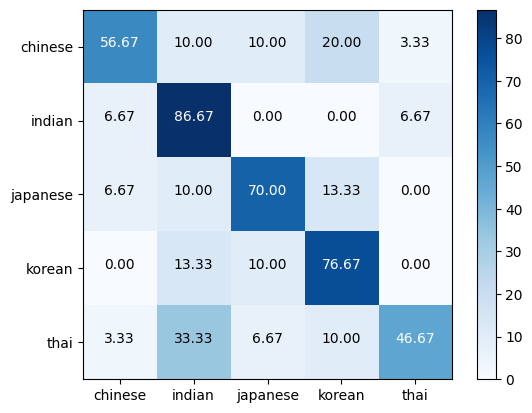

In [92]:
plt.imshow(asian_confusion_matrix, cmap="Blues", interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(np.unique(test_cuisine)))
plt.xticks(tick_marks, np.unique(test_cuisine))
plt.yticks(tick_marks, np.unique(test_cuisine))

fmt = '.2f'
thresh = asian_confusion_matrix.max() / 2.
for i, j in itertools.product(range(asian_confusion_matrix.shape[0]), range(asian_confusion_matrix.shape[1])):
    plt.text(j, i, format(asian_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if asian_confusion_matrix[i, j] > thresh else "black")

    
plt.show()

he rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:

- Using the first row in the confusion matrix, 56.67% of the Chinese recipes in bamboo_test were correctly classified by our decision tree whereas 20% were misclassified as Korean, 10% were misclassified as Indian, 10% were misclassified as Japanese, and only 3.33% were misclassified as Thai.

- Using the Indian row, 86.67% of the Indian recipes in bamboo_test were correctly classified by our decision tree, 6.67% were misclassified as Chinese, another 6.67% were misclassified as Thai, and 0% were misclassified as Japanese and Korean.
